In [5]:
%pip install seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import joblib


Note: you may need to restart the kernel to use updated packages.



## 1.	**Exploratory Data Analysis (EDA):**
* Describe the dataset: Understand the structure, columns, and data types.
* Clean the data: Check for invalid records, missing values, duplicated records, and outliers.
* Handle missing values: Detect missing values and apply appropriate imputation techniques.
* Detect outliers: Identify outliers and decide whether to remove or transform them.


In [6]:
# Load unstructured Dataset

df = pd.read_csv("Dataset.csv")

In [7]:
# View first 5 default rows

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,3,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,?,0,5,27,32
3,4,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1


In [8]:
# Check Data Types (i.e.- int, bool, float, object)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     17379 non-null  int64 
 1   dteday      17379 non-null  object
 2   season      17379 non-null  object
 3   yr          17379 non-null  object
 4   mnth        17379 non-null  object
 5   hr          17379 non-null  int64 
 6   holiday     17379 non-null  object
 7   weekday     17379 non-null  int64 
 8   workingday  17379 non-null  object
 9   weathersit  17379 non-null  object
 10  temp        17379 non-null  object
 11  atemp       17379 non-null  object
 12  hum         17379 non-null  object
 13  windspeed   17379 non-null  object
 14  casual      17379 non-null  object
 15  registered  17379 non-null  object
 16  cnt         17379 non-null  int64 
dtypes: int64(4), object(13)
memory usage: 2.3+ MB


From the above code we can check data types and it also gives us the number of columns and rows in the dataset.

However to find out rows and columns below is the code.

In [9]:
# Check Rows and Columns in Dataset

df.shape

(17379, 17)

In [10]:
# Column Names

df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
# Check summary of Numerical column

df.describe()

,instant,hr,weekday,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000
mean,8690.0000,11.546752,3.003683,189.463088
std,5017.0295,6.914405,2.005771,181.387599
min,1.0000,0.000000,0.000000,1.000000
25%,4345.5000,6.000000,1.000000,40.000000
50%,8690.0000,12.000000,3.000000,142.000000
75%,13034.5000,18.000000,5.000000,281.000000
max,17379.0000,23.000000,6.000000,977.000000


In [12]:
# Check Missing Values

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
# Check for duplicated values

df.duplicated().sum()

np.int64(0)

In [14]:
# To check unique values in the dataset

for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].unique())     # returns all distinct (unique) values in that column


Column: instant
[    1     2     3 ... 17377 17378 17379]

Column: dteday
['01-01-2011' '02-01-2011' '03-01-2011' '04-01-2011' '05-01-2011'
 '06-01-2011' '07-01-2011' '08-01-2011' '09-01-2011' '10-01-2011'
 '11-01-2011' '12-01-2011' '13-01-2011' '14-01-2011' '15-01-2011'
 '16-01-2011' '17-01-2011' '18-01-2011' '19-01-2011' '20-01-2011'
 '21-01-2011' '22-01-2011' '23-01-2011' '24-01-2011' '25-01-2011'
 '26-01-2011' '27-01-2011' '28-01-2011' '29-01-2011' '30-01-2011'
 '31-01-2011' '01-02-2011' '02-02-2011' '03-02-2011' '04-02-2011'
 '05-02-2011' '06-02-2011' '07-02-2011' '08-02-2011' '09-02-2011'
 '10-02-2011' '11-02-2011' '12-02-2011' '13-02-2011' '14-02-2011'
 '15-02-2011' '16-02-2011' '17-02-2011' '18-02-2011' '19-02-2011'
 '20-02-2011' '21-02-2011' '22-02-2011' '23-02-2011' '24-02-2011'
 '25-02-2011' '26-02-2011' '27-02-2011' '28-02-2011' '01-03-2011'
 '02-03-2011' '03-03-2011' '04-03-2011' '05-03-2011' '06-03-2011'
 '07-03-2011' '08-03-2011' '09-03-2011' '10-03-2011' '11-03-2011'
 

In [15]:
# Replace hidden / missing values (?) with NaN

df.replace('?', np.nan, inplace=True)

In [16]:
# Recheck for Missing Values

df.isnull().sum()

instant        0
dteday         0
season         6
yr             1
mnth           1
hr             0
holiday        1
weekday        0
workingday     5
weathersit     4
temp          11
atemp          6
hum            6
windspeed      5
casual         1
registered     1
cnt            0
dtype: int64

In [17]:
## Check NaN values percentage

nan_percent = (df.isna().sum() / len(df)) * 100
nan_percent

instant       0.000000
dteday        0.000000
season        0.034524
yr            0.005754
mnth          0.005754
hr            0.000000
holiday       0.005754
weekday       0.000000
workingday    0.028770
weathersit    0.023016
temp          0.063295
atemp         0.034524
hum           0.034524
windspeed     0.028770
casual        0.005754
registered    0.005754
cnt           0.000000
dtype: float64

In the above step we can see that the nan value is less than 5% therefore:

Missing values % is < 5%	so we can drop rows with NaN

In [18]:
# Drop NaN values

df.dropna(inplace=True)

In [19]:
# Recheck Missing Values

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [20]:

# Check Data Types after removing NaN values from the dataset (i.e.- int, bool, float, object)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17339 entries, 0 to 17377
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     17339 non-null  int64 
 1   dteday      17339 non-null  object
 2   season      17339 non-null  object
 3   yr          17339 non-null  object
 4   mnth        17339 non-null  object
 5   hr          17339 non-null  int64 
 6   holiday     17339 non-null  object
 7   weekday     17339 non-null  int64 
 8   workingday  17339 non-null  object
 9   weathersit  17339 non-null  object
 10  temp        17339 non-null  object
 11  atemp       17339 non-null  object
 12  hum         17339 non-null  object
 13  windspeed   17339 non-null  object
 14  casual      17339 non-null  object
 15  registered  17339 non-null  object
 16  cnt         17339 non-null  int64 
dtypes: int64(4), object(13)
memory usage: 2.4+ MB


In [21]:
# Check Data Types in the dataset for each column

df.dtypes

instant        int64
dteday        object
season        object
yr            object
mnth          object
hr             int64
holiday       object
weekday        int64
workingday    object
weathersit    object
temp          object
atemp         object
hum           object
windspeed     object
casual        object
registered    object
cnt            int64
dtype: object

In [22]:
# View first 5 default rows of the transformed dataset

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
3,4,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1
5,6,01-01-2011,springer,2011,1,5,No,6,No work,Mist,0.24,0.2576,0.75,0.0896,0,1,1


In [23]:
# Check summary of Numerical column

df.describe()

,instant,hr,weekday,cnt
count,17339.000000,17339.000000,17339.000000,17339.000000
mean,8685.979814,11.544899,3.004095,189.733318
std,5005.903515,6.915829,2.005281,181.487048
min,1.000000,0.000000,0.000000,1.000000
25%,4351.500000,6.000000,1.000000,40.000000
50%,8686.000000,12.000000,3.000000,142.000000
75%,13020.500000,18.000000,5.000000,281.000000
max,17378.000000,23.000000,6.000000,977.000000


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

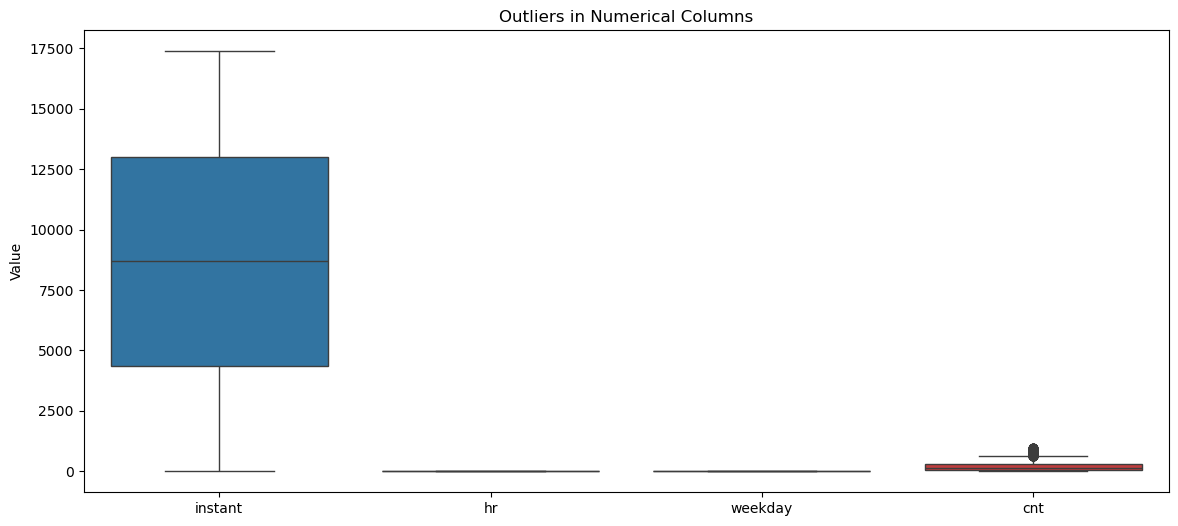

In [25]:
# Check Outliers from the Numerical Column

plt.figure(figsize=(14,6))
sns.boxplot(df)
plt.ylabel('Value')
plt.title('Outliers in Numerical Columns')
plt.show()

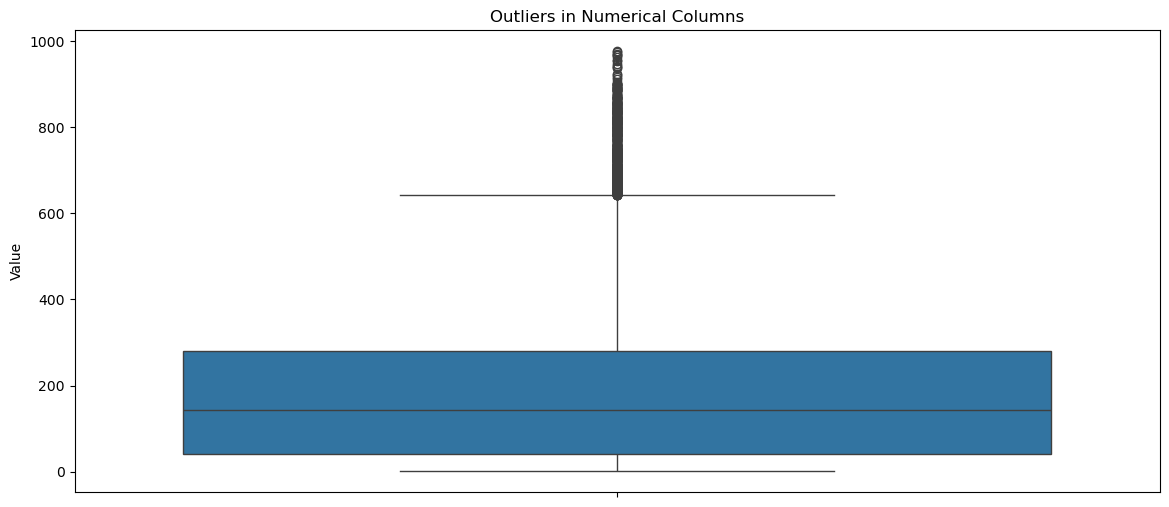

In [26]:
# Check for outlier with more clarity in the boxplot

plt.figure(figsize=(14,6))
sns.boxplot(df['cnt'])
plt.ylabel('Value')
plt.title('Outliers in Numerical Columns')
plt.show()

* The initial boxplot visualization of the numerical columns (instant, hr, weekday, cnt) shows the presence of outliers in 'cnt' column, indicated by data points extending far beyond the whiskers of the boxplots.

In [27]:

# Using Inter Quartile Range (IQR) Method to remove the outliers in the numeric column if any. (As we can see 'cnt' shows some outliers as per the boxplot)

def outlier_capping(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_extreme = Q1 - 1.5 * IQR
    upper_extreme = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: lower_extreme if x < lower_extreme else upper_extreme if x > upper_extreme else x)

for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

* To address these, an outlier capping function was applied using the Interquartile Range (IQR) method.

* This process identifies values outside the 1.5 * IQR range from the first and third quartiles and replaced them with the respective lower or upper extreme values.

* The subsequent boxplot, after this capping, visually confirms that these outliers have been handled, resulting in a more contained distribution within the boxplots and their whiskers.

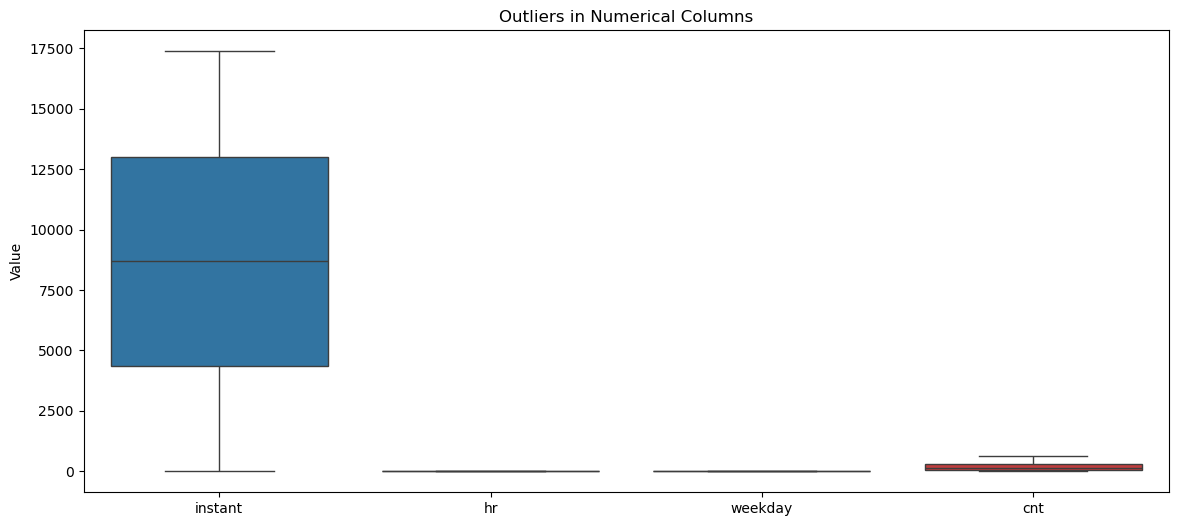

In [28]:
# After handeling outliers in the dataset (Numerical Columns)

plt.figure(figsize=(14,6))
sns.boxplot(df)
plt.ylabel('Value')
plt.title('Outliers in Numerical Columns')
plt.show()

* After removing the outliers boxplot visualization of the numerical columns (instant, hr, weekday, cnt) shows no presence of outliers in 'cnt' column.

In [29]:
# After correcting outliers summary of Numerical Column

df.describe()

,instant,hr,weekday,cnt
count,17339.000000,17339.000000,17339.000000,17339.000000
mean,8685.979814,11.544899,3.004095,186.624402
std,5005.903515,6.915829,2.005281,172.018498
min,1.000000,0.000000,0.000000,1.000000
25%,4351.500000,6.000000,1.000000,40.000000
50%,8686.000000,12.000000,3.000000,142.000000
75%,13020.500000,18.000000,5.000000,281.000000
max,17378.000000,23.000000,6.000000,642.500000


### **TIME SERIES**

In [30]:
# Time parse to convert dates to date time objects
# Checking the seasonality using time series

# Reset the index to make 'dteday' a regular column
df = df.reset_index()
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y') # Converts dteday column to object/string to datetime datatype

# NOTE: string dates cannot be used for 1. Date arithmatic, 2. Time based sorting and 3. Resampling.

df['datetime']=df['dteday']+pd.to_timedelta(df['hr'],unit='h') # this is used to convert 'hr' column to time duration and adds the duration to date to form full timestamp (1,2,3 to 1h,2h,3h etc)
# date+hour = full datetime

# this is necessary since bike demand varies hour by hour
# using only dates would lose hourly patterns
# provides accurate trend visualization

df=df.sort_values('datetime') # sorts dataset to chronological order (Past -> Present -> Future)

# Time series data must be sorted chronologically to preserve temporal dependencies.

df.set_index('datetime',inplace=True) # this makes index of dataframe

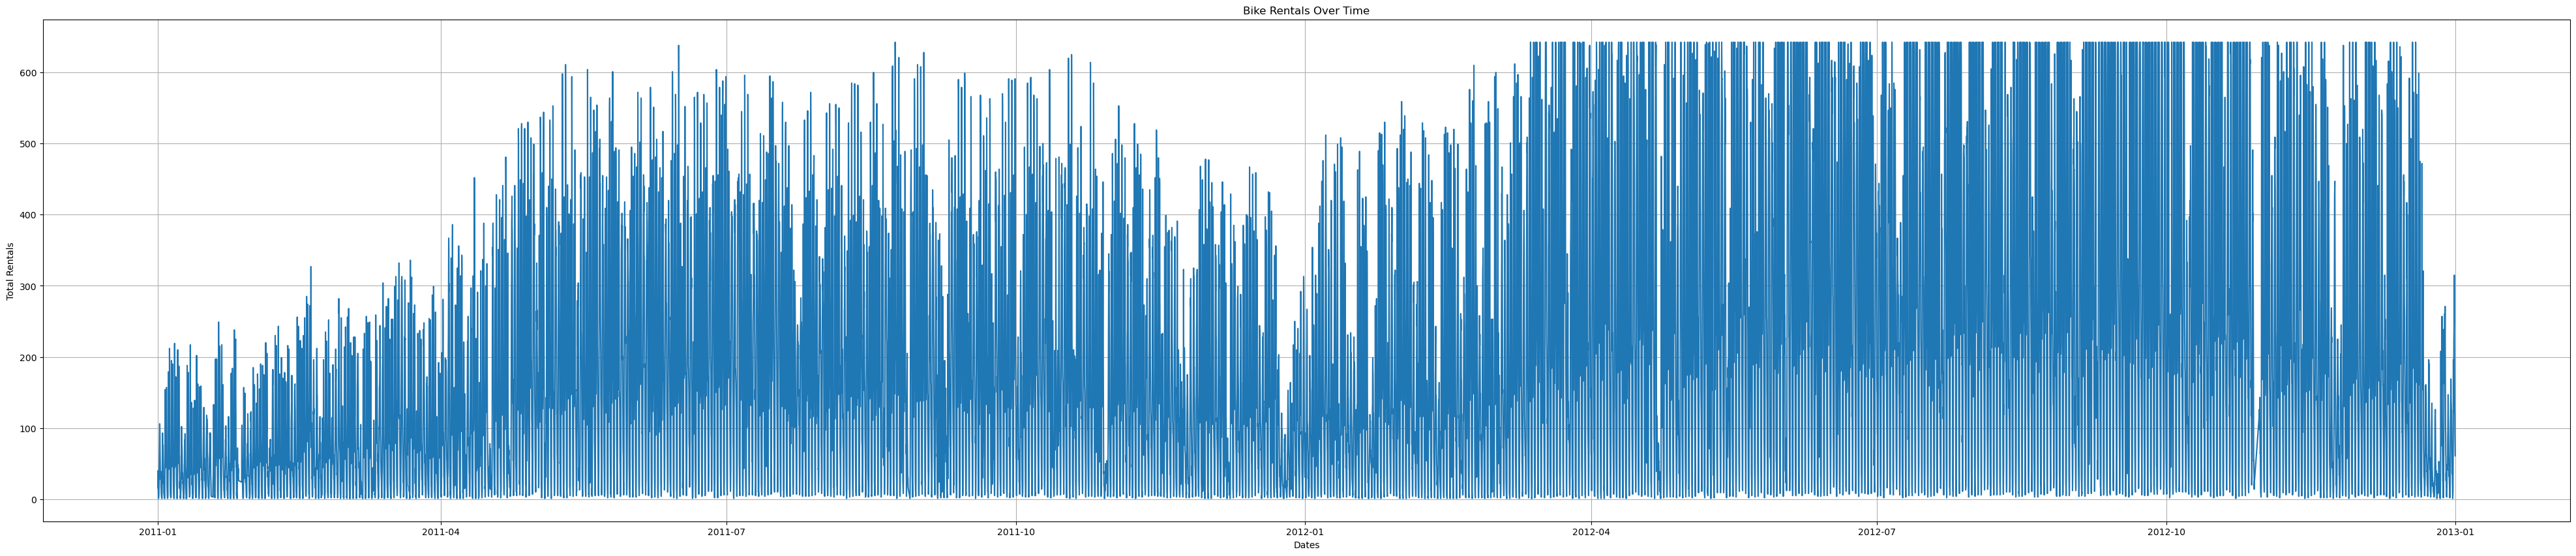

In [31]:
# Plot time series to visualize trends, seasonality, and anomalies

plt.figure(figsize=(50,10))
plt.tight_layout()
plt.plot(df['cnt'])
plt.title('Bike Rentals Over Time')
plt.xlabel('Dates')
plt.ylabel('Total Rentals')
plt.grid(True)
plt.show()

* We can observe seasonality and trend in the above time series graph

* During initial 4 months the demand is less compared to demand from May to October and then the demand again declines from November to April.

* We can also observe trend, there is an upward trend with the same seasonality.

   * From 2011-01 to 2011-04 the demand is less compared to demands from 2011-05 to 2011-10.
   * From 2011-11 to 2012-03 the demand declines but we see an upward trend compared to 2011.
   * Simultaneously we can say for the subsequent months.

In [32]:
# Resampling

daily_cnt=df['cnt'].resample('D').sum() # Hourly data is noisy, hence we use daily demand

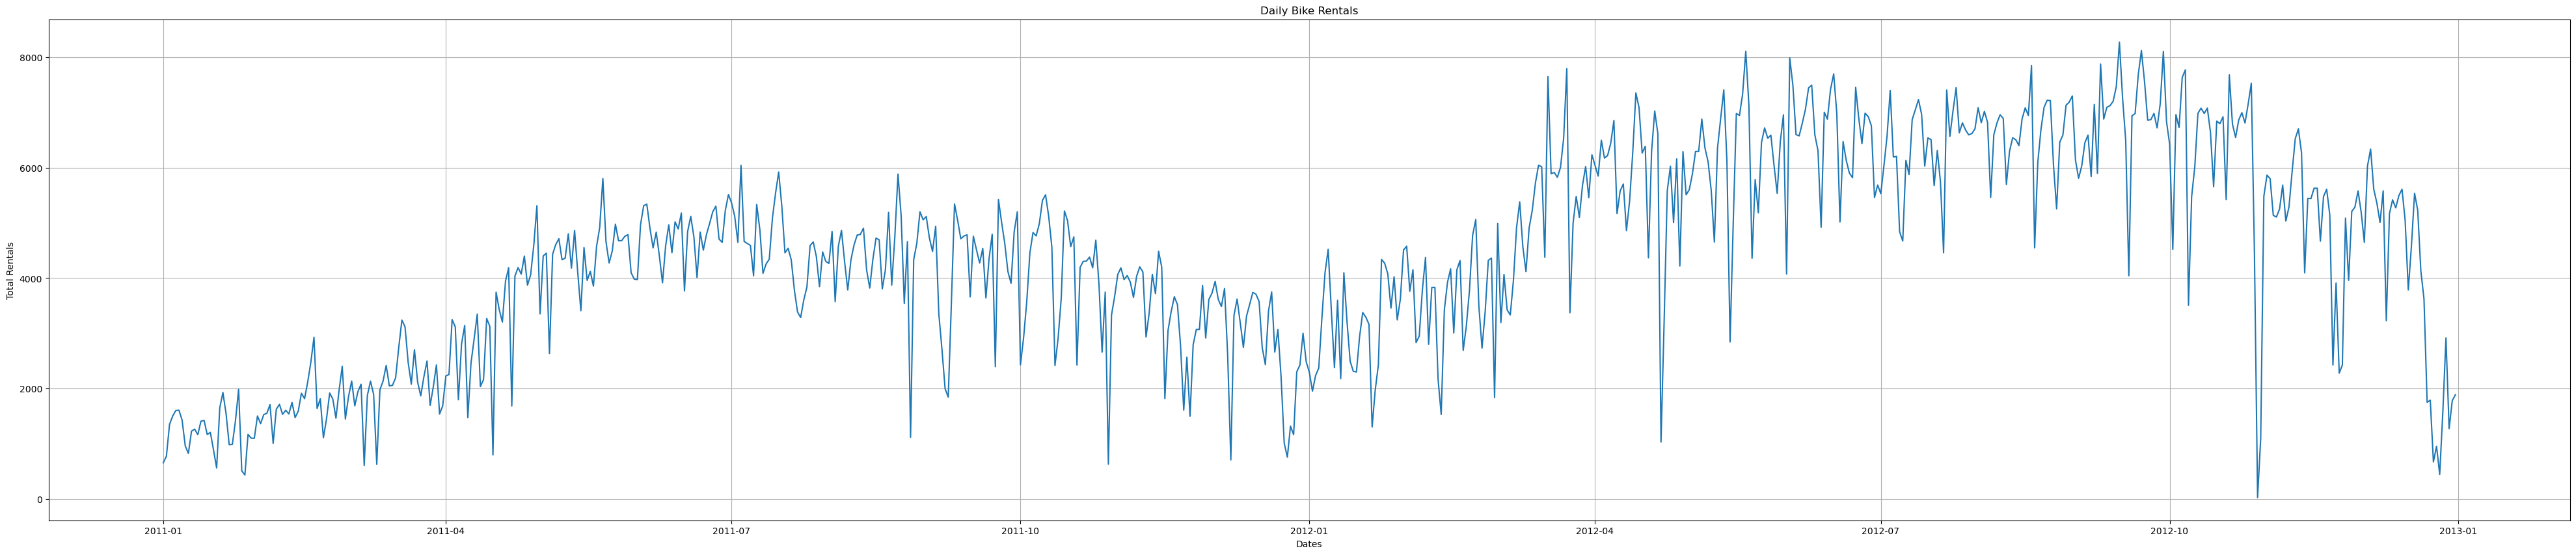

In [33]:
# Plot time series after resampling to visualize trends, seasonality, and anomalies

plt.figure(figsize=(50,10))
plt.tight_layout()
plt.plot(daily_cnt)
plt.title('Daily Bike Rentals')
plt.xlabel('Dates')
plt.ylabel('Total Rentals')
plt.grid(True)
plt.show()

* Post Resampling:

We can also observe trend, there is an upward trend with the same seasonality.

   * From 2011-01 to 2011-04 the demand is less compared to demands from 2011-05 to 2011-10.
   * From 2011-11 to 2012-03 the demand declines but we see an upward trend compared to 2011.
   * Simultaneously we can say for the subsequent months.

## 2.	**Data Visualization:**

* Creating visualizations such as scatter plots, line plots, and bar plots to explore relationships between variables.
* Plotting time series data to analyze trends and seasonality.
* Using heatmaps or correlation matrices to understand the correlation between different features.
* Utilizing seaborn, matplotlib, or other libraries for generating informative and visually appealing plots.


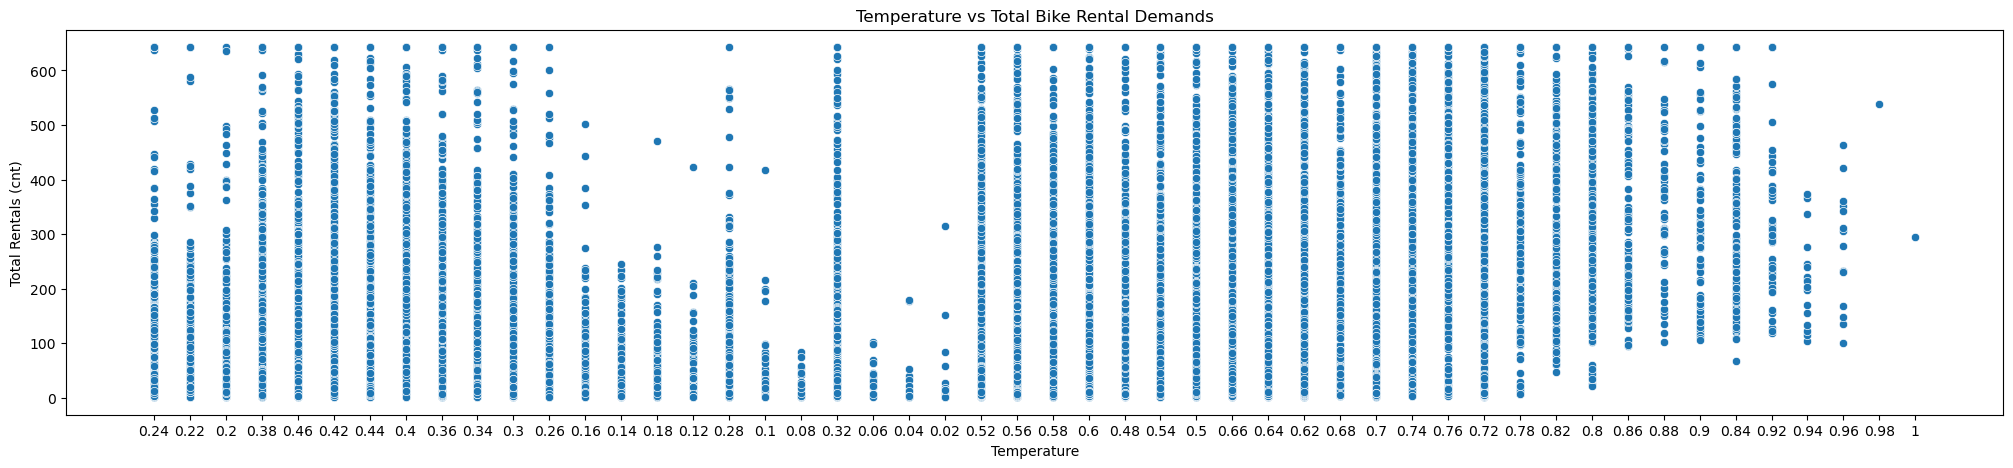

In [34]:
# Temperature vs Bike demand

plt.figure(figsize=(25,5))
sns.scatterplot(x='temp', y='cnt', data=df)
plt.title('Temperature vs Total Bike Rental Demands')
plt.xlabel('Temperature')
plt.ylabel('Total Rentals (cnt)')
plt.show()

The scatter plot illustrates the relationship between temperature and total bike rental demands.

It generally shows a positive correlation, meaning as the temperature increases, the total number of bike rentals also tends to increase.

The data points appear to be more concentrated in certain temperature ranges, indicating common conditions under which bikes are rented.

The plot helps visualize how comfortable weather conditions might drive higher bike usage.

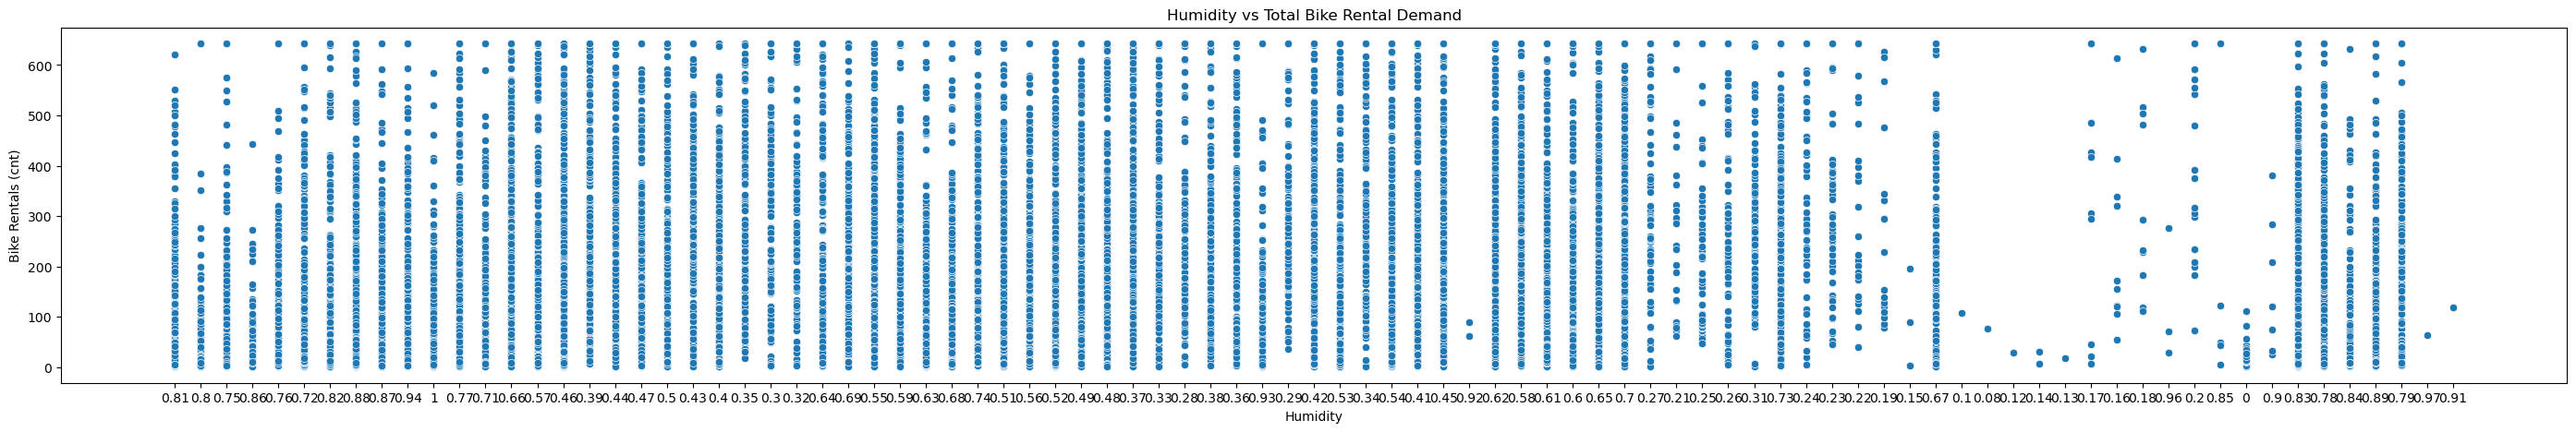

In [35]:
# Humidity vs Demand

plt.figure(figsize=(35,5))
sns.scatterplot(x='hum', y='cnt', data=df)
plt.title("Humidity vs Total Bike Rental Demand")
plt.xlabel("Humidity")
plt.ylabel("Bike Rentals (cnt)")
plt.show()

The scatter plot showing 'Humidity vs Total Bike Rental Demand' would likely indicate that as humidity increases, the bike rental demand tends to decrease, especially at very high humidity levels.

This suggests that uncomfortable humid conditions deter people from renting bikes.

Conversely, moderate humidity levels might see higher bike rental activity.

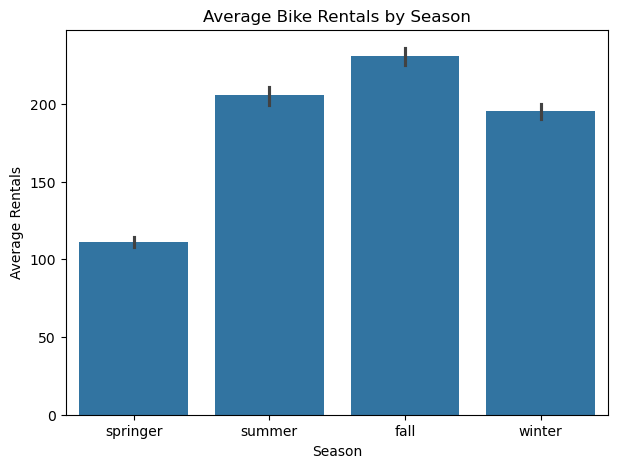

In [36]:
# Average Demand by season

plt.figure(figsize=(7,5))
sns.barplot(x='season', y='cnt', data=df)
plt.title('Average Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.show()

The bar plot shows the average bike rentals by season.

It clearly illustrates that bike rental demand is highest during the 'fall' and 'summer' seasons, with 'springer' (spring) having the lowest average rentals.

'Winter' also shows a lower demand compared to summer and fall.

This indicates a strong seasonal pattern where warmer months (summer, fall) lead to significantly higher bike usage.

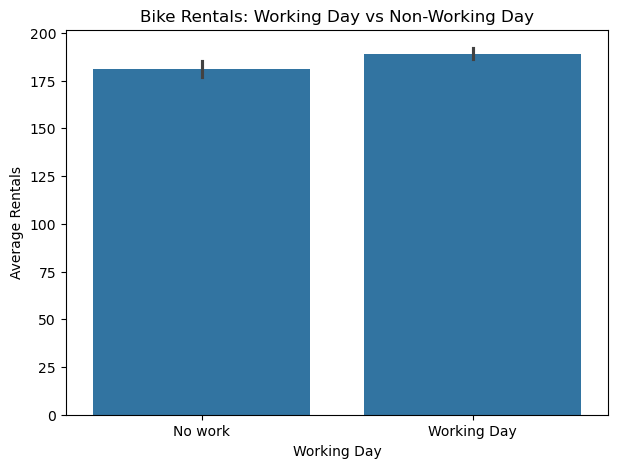

In [37]:
# Working day vs Non-Working day

plt.figure(figsize=(7,5))
sns.barplot(x='workingday', y='cnt', data=df)
plt.title("Bike Rentals: Working Day vs Non-Working Day")
plt.xlabel("Working Day")
plt.ylabel("Average Rentals")
plt.show()

The bar plot comparing 'Working Day vs Non-Working Day' for bike rentals typically shows a difference in usage patterns.

Generally, bike rental demand might be slightly higher on working days, as people use bikes for commuting.

However, if the dataset includes recreational usage, non-working days (weekends and holidays) could also show significant or even higher demand due to leisure activities.

The plot helps to clarify whether the bike sharing system is primarily used for utility (commuting) or leisure, or a mix of both.

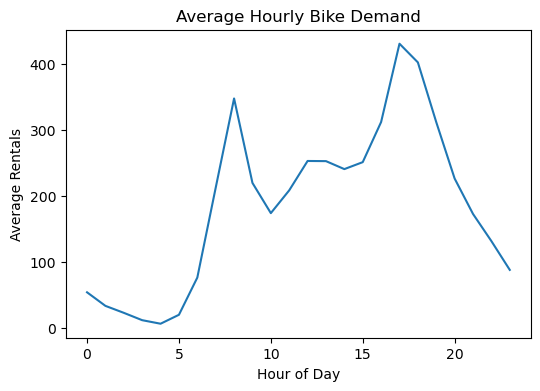

In [38]:
hourly_demand = df.groupby('hr')['cnt'].mean()

plt.figure(figsize=(6,4))
plt.plot(hourly_demand)
plt.title("Average Hourly Bike Demand")
plt.xlabel("Hour of Day")
plt.ylabel("Average Rentals")
plt.show()

Peak demand occurs during morning and evening commute hours.

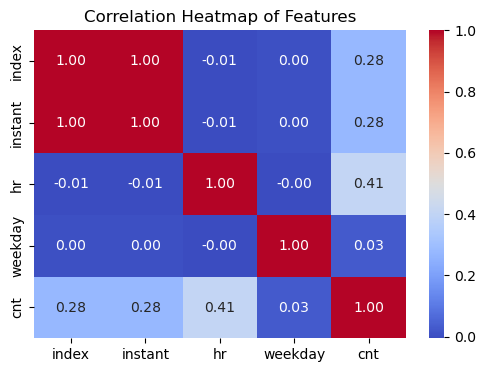

In [39]:
plt.figure(figsize=(6,4))
sns.heatmap(df.select_dtypes(include='number').corr(), cmap='coolwarm', fmt=".2f",annot=True)
plt.title('Correlation Heatmap of Features')
plt.show()

In [40]:
df.head()

,index,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
datetime,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,1,2011-01-01,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16.0
2011-01-01 01:00:00,1,2,2011-01-01,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40.0
2011-01-01 03:00:00,3,4,2011-01-01,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13.0
2011-01-01 04:00:00,4,5,2011-01-01,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1.0
2011-01-01 05:00:00,5,6,2011-01-01,springer,2011,1,5,No,6,No work,Mist,0.24,0.2576,0.75,0.0896,0,1,1.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17339 entries, 2011-01-01 00:00:00 to 2012-12-31 22:00:00
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       17339 non-null  int64         
 1   instant     17339 non-null  int64         
 2   dteday      17339 non-null  datetime64[ns]
 3   season      17339 non-null  object        
 4   yr          17339 non-null  object        
 5   mnth        17339 non-null  object        
 6   hr          17339 non-null  int64         
 7   holiday     17339 non-null  object        
 8   weekday     17339 non-null  int64         
 9   workingday  17339 non-null  object        
 10  weathersit  17339 non-null  object        
 11  temp        17339 non-null  object        
 12  atemp       17339 non-null  object        
 13  hum         17339 non-null  object        
 14  windspeed   17339 non-null  object        
 15  casual      17339 non-null  object 

In [42]:
num_fix_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']

for col in num_fix_cols:
    df[col] = pd.to_numeric(df[col])

## 3.	**Feature Engineering:**

* Generating new features from existing ones to improve model performance.
* Handling categorical variables through techniques like one-hot encoding or label encoding.
* Scaling or normalizing numerical features to ensure uniformity in their ranges.
* Incorporating domain knowledge to create meaningful features that capture important aspects of the data.


generating new features from existing ones

In [43]:
df['day'] = df['dteday'].dt.day
df['month'] = df['dteday'].dt.month
df['year'] = df['dteday'].dt.year
df['is_peak_hour']=np.where(((df['hr']>=7)&(df['hr']<=9))|((df['hr']>=16)&(df['hr']<=18)),1,0)
df['is_weekend']=np.where(df['weekday'].isin([5,6]),1,0)

* Creating new features from existing ones.
* Creating features day, month,year from dteday column
* Creating features is_peak_hour from on hr if is_peak_hour shows 0 else 1
* Creating feature is_weekend from  weekday whether it is saturday or sunday. if its weekend shows 0 else 1

In [44]:
#Label Encoding
label_cols = ['season', 'yr', 'mnth', 'holiday', 'workingday', 'weathersit']
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [45]:
df.head()

,index,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,...,hum,windspeed,casual,registered,cnt,day,month,year,is_peak_hour,is_weekend
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,1,2011-01-01,1,0,0,0,0,6,0,...,0.81,0.0000,3,13,16.0,1,1,2011,0,1
2011-01-01 01:00:00,1,2,2011-01-01,1,0,0,1,0,6,0,...,0.80,0.0000,8,32,40.0,1,1,2011,0,1
2011-01-01 03:00:00,3,4,2011-01-01,1,0,0,3,0,6,0,...,0.75,0.0000,3,10,13.0,1,1,2011,0,1
2011-01-01 04:00:00,4,5,2011-01-01,1,0,0,4,0,6,0,...,0.75,0.0000,0,1,1.0,1,1,2011,0,1
2011-01-01 05:00:00,5,6,2011-01-01,1,0,0,5,0,6,0,...,0.75,0.0896,0,1,1.0,1,1,2011,0,1


In [46]:
df = pd.get_dummies(
    df,
    columns=['season', 'holiday', 'workingday', 'weathersit'],
    drop_first=True
)

In [47]:
from sklearn.preprocessing import StandardScaler

numeric_cols=['temp','atemp','hum','windspeed']

scaler = StandardScaler()

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

* Normalizing the numeric features  so they have same scale.
* Each column has mean=0 and std=1.
* To improve model performance
* To speed up training (faster convergence)
* To avoid unit bias

In [48]:
df.head()

,index,instant,dteday,yr,mnth,hr,weekday,temp,atemp,hum,...,is_peak_hour,is_weekend,season_1,season_2,season_3,holiday_1,workingday_1,weathersit_1,weathersit_2,weathersit_3
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,1,2011-01-01,0,0,0,6,-1.338364,-1.096937,0.947469,...,0,1,True,False,False,False,False,False,False,False
2011-01-01 01:00:00,1,2,2011-01-01,0,0,1,6,-1.442304,-1.185455,0.895652,...,0,1,True,False,False,False,False,False,False,False
2011-01-01 03:00:00,3,4,2011-01-01,0,0,3,6,-1.338364,-1.096937,0.636568,...,0,1,True,False,False,False,False,False,False,False
2011-01-01 04:00:00,4,5,2011-01-01,0,0,4,6,-1.338364,-1.096937,0.636568,...,0,1,True,False,False,False,False,False,False,False
2011-01-01 05:00:00,5,6,2011-01-01,0,0,5,6,-1.338364,-1.273390,0.636568,...,0,1,True,False,False,False,False,False,False,True


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17339 entries, 2011-01-01 00:00:00 to 2012-12-31 22:00:00
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         17339 non-null  int64         
 1   instant       17339 non-null  int64         
 2   dteday        17339 non-null  datetime64[ns]
 3   yr            17339 non-null  int64         
 4   mnth          17339 non-null  int64         
 5   hr            17339 non-null  int64         
 6   weekday       17339 non-null  int64         
 7   temp          17339 non-null  float64       
 8   atemp         17339 non-null  float64       
 9   hum           17339 non-null  float64       
 10  windspeed     17339 non-null  float64       
 11  casual        17339 non-null  int64         
 12  registered    17339 non-null  int64         
 13  cnt           17339 non-null  float64       
 14  day           17339 non-null  int32         
 15  m

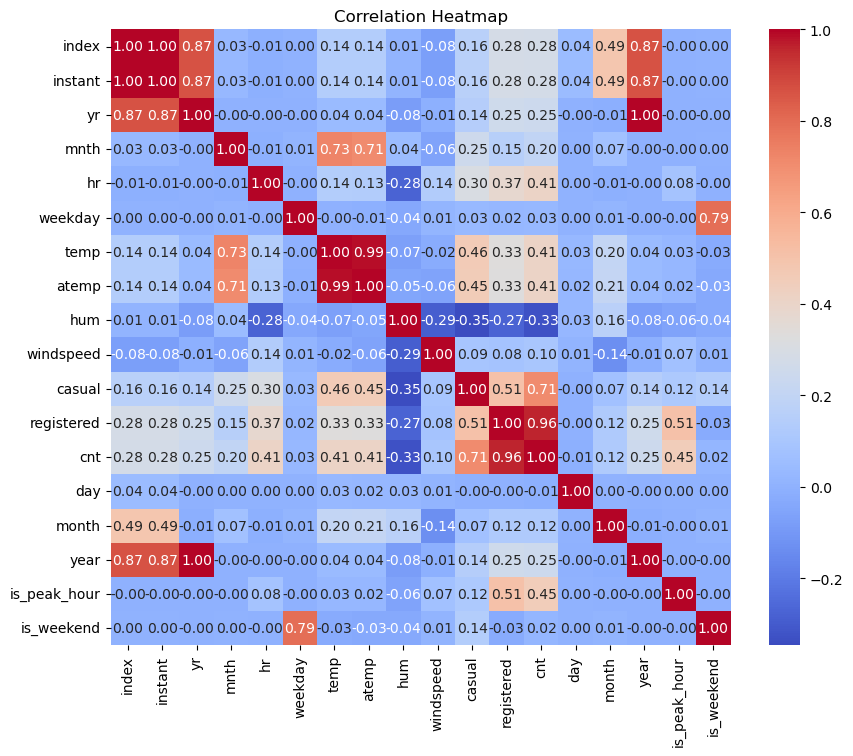

In [50]:
corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## 4. **Model Building:**
* Selecting appropriate machine learning algorithms such as Decision Tree, Random Forest, and Gradient Boosting Regression for predicting bike rental demand.
* Splitting the dataset into training and testing sets for model evaluation.
* Training various models using the training data and evaluating their performance using metrics like RMSE, MAE, or R-squared.
* Fine-tuning model parameters to optimize performance.

In [51]:
data=df.copy()

In [52]:
target_col = "cnt"   # change to 'count' if needed

X = data.drop(columns=[target_col])
y = data[target_col]


In [53]:
# Remove datetime columns (FIX)

X = X.select_dtypes(exclude=['datetime64[ns]'])

In [54]:
# Train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (13871, 25)
X_test shape: (3468, 25)
y_train shape: (13871,)
y_test shape: (3468,)


In [55]:
# Models & metrics

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.model_selection import GridSearchCV

In [56]:
def evaluate(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return (
        np.sqrt(mean_squared_error(y_test, y_pred)),
        mean_absolute_error(y_test, y_pred),
        mean_squared_error(y_test, y_pred),
        r2_score(y_test, y_pred)
    )

In [57]:
dt = evaluate(DecisionTreeRegressor(max_depth=10,random_state=42))
rf = evaluate(RandomForestRegressor(n_estimators=200,max_depth=15,random_state=42))
gb = evaluate(GradientBoostingRegressor(n_estimators=200, learning_rate=0.1,random_state=42))

In [58]:
pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest", "Gradient Boosting"],
    "RMSE": [dt[0], rf[0], gb[0]],
    "MAE": [dt[1], rf[1], gb[1]],
    'MAE': [dt[2], rf[2], gb[2]],
    "R2": [dt[3], rf[3], gb[3]]
}).sort_values(by="RMSE")


,Model,RMSE,MAE,R2
1,Random Forest,1.942230,3.772259,0.999874
2,Gradient Boosting,4.304636,18.529887,0.999381
0,Decision Tree,5.066938,25.673858,0.999143


## 5.	**Hyperparameter Tuning:**

* Conducting hyperparameter tuning for Decision Tree, Random Forest, and Gradient Boosting Regression using techniques like grid search or random search to find the best combination of model parameters.
* Evaluating model performance with different hyperparameter values using cross-validation techniques.
* Balancing model complexity and performance to prevent overfitting or underfitting.


In [59]:
# Decision Tree

In [60]:
dt = DecisionTreeRegressor(random_state=42)

dt_params = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

dt_grid = GridSearchCV(
    estimator=dt,
    param_grid=dt_params,
    cv=5
)

dt_grid.fit(X_train, y_train)

print("Decision Tree Best Parameters:", dt_grid.best_params_)
print('Decision Tree Best Model:', dt_grid.best_estimator_)
print(f'Training Score: {dt_grid.score(X_train, y_train)}')
print(f'Testing Score: {dt_grid.score(X_test, y_test)}')

Decision Tree Best Parameters: {'max_depth': 20, 'min_samples_split': 5}
Decision Tree Best Model: DecisionTreeRegressor(max_depth=20, min_samples_split=5, random_state=42)
Training Score: 0.9999652594273678
Testing Score: 0.9993389925301126


In [61]:
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_split': [2, 5, 10]})

In [62]:
# For Decision Tree, I used GridSearchCV to test different values of tree depth and minimum samples split. This helps in selecting the optimal tree structure instead of using default parameters.

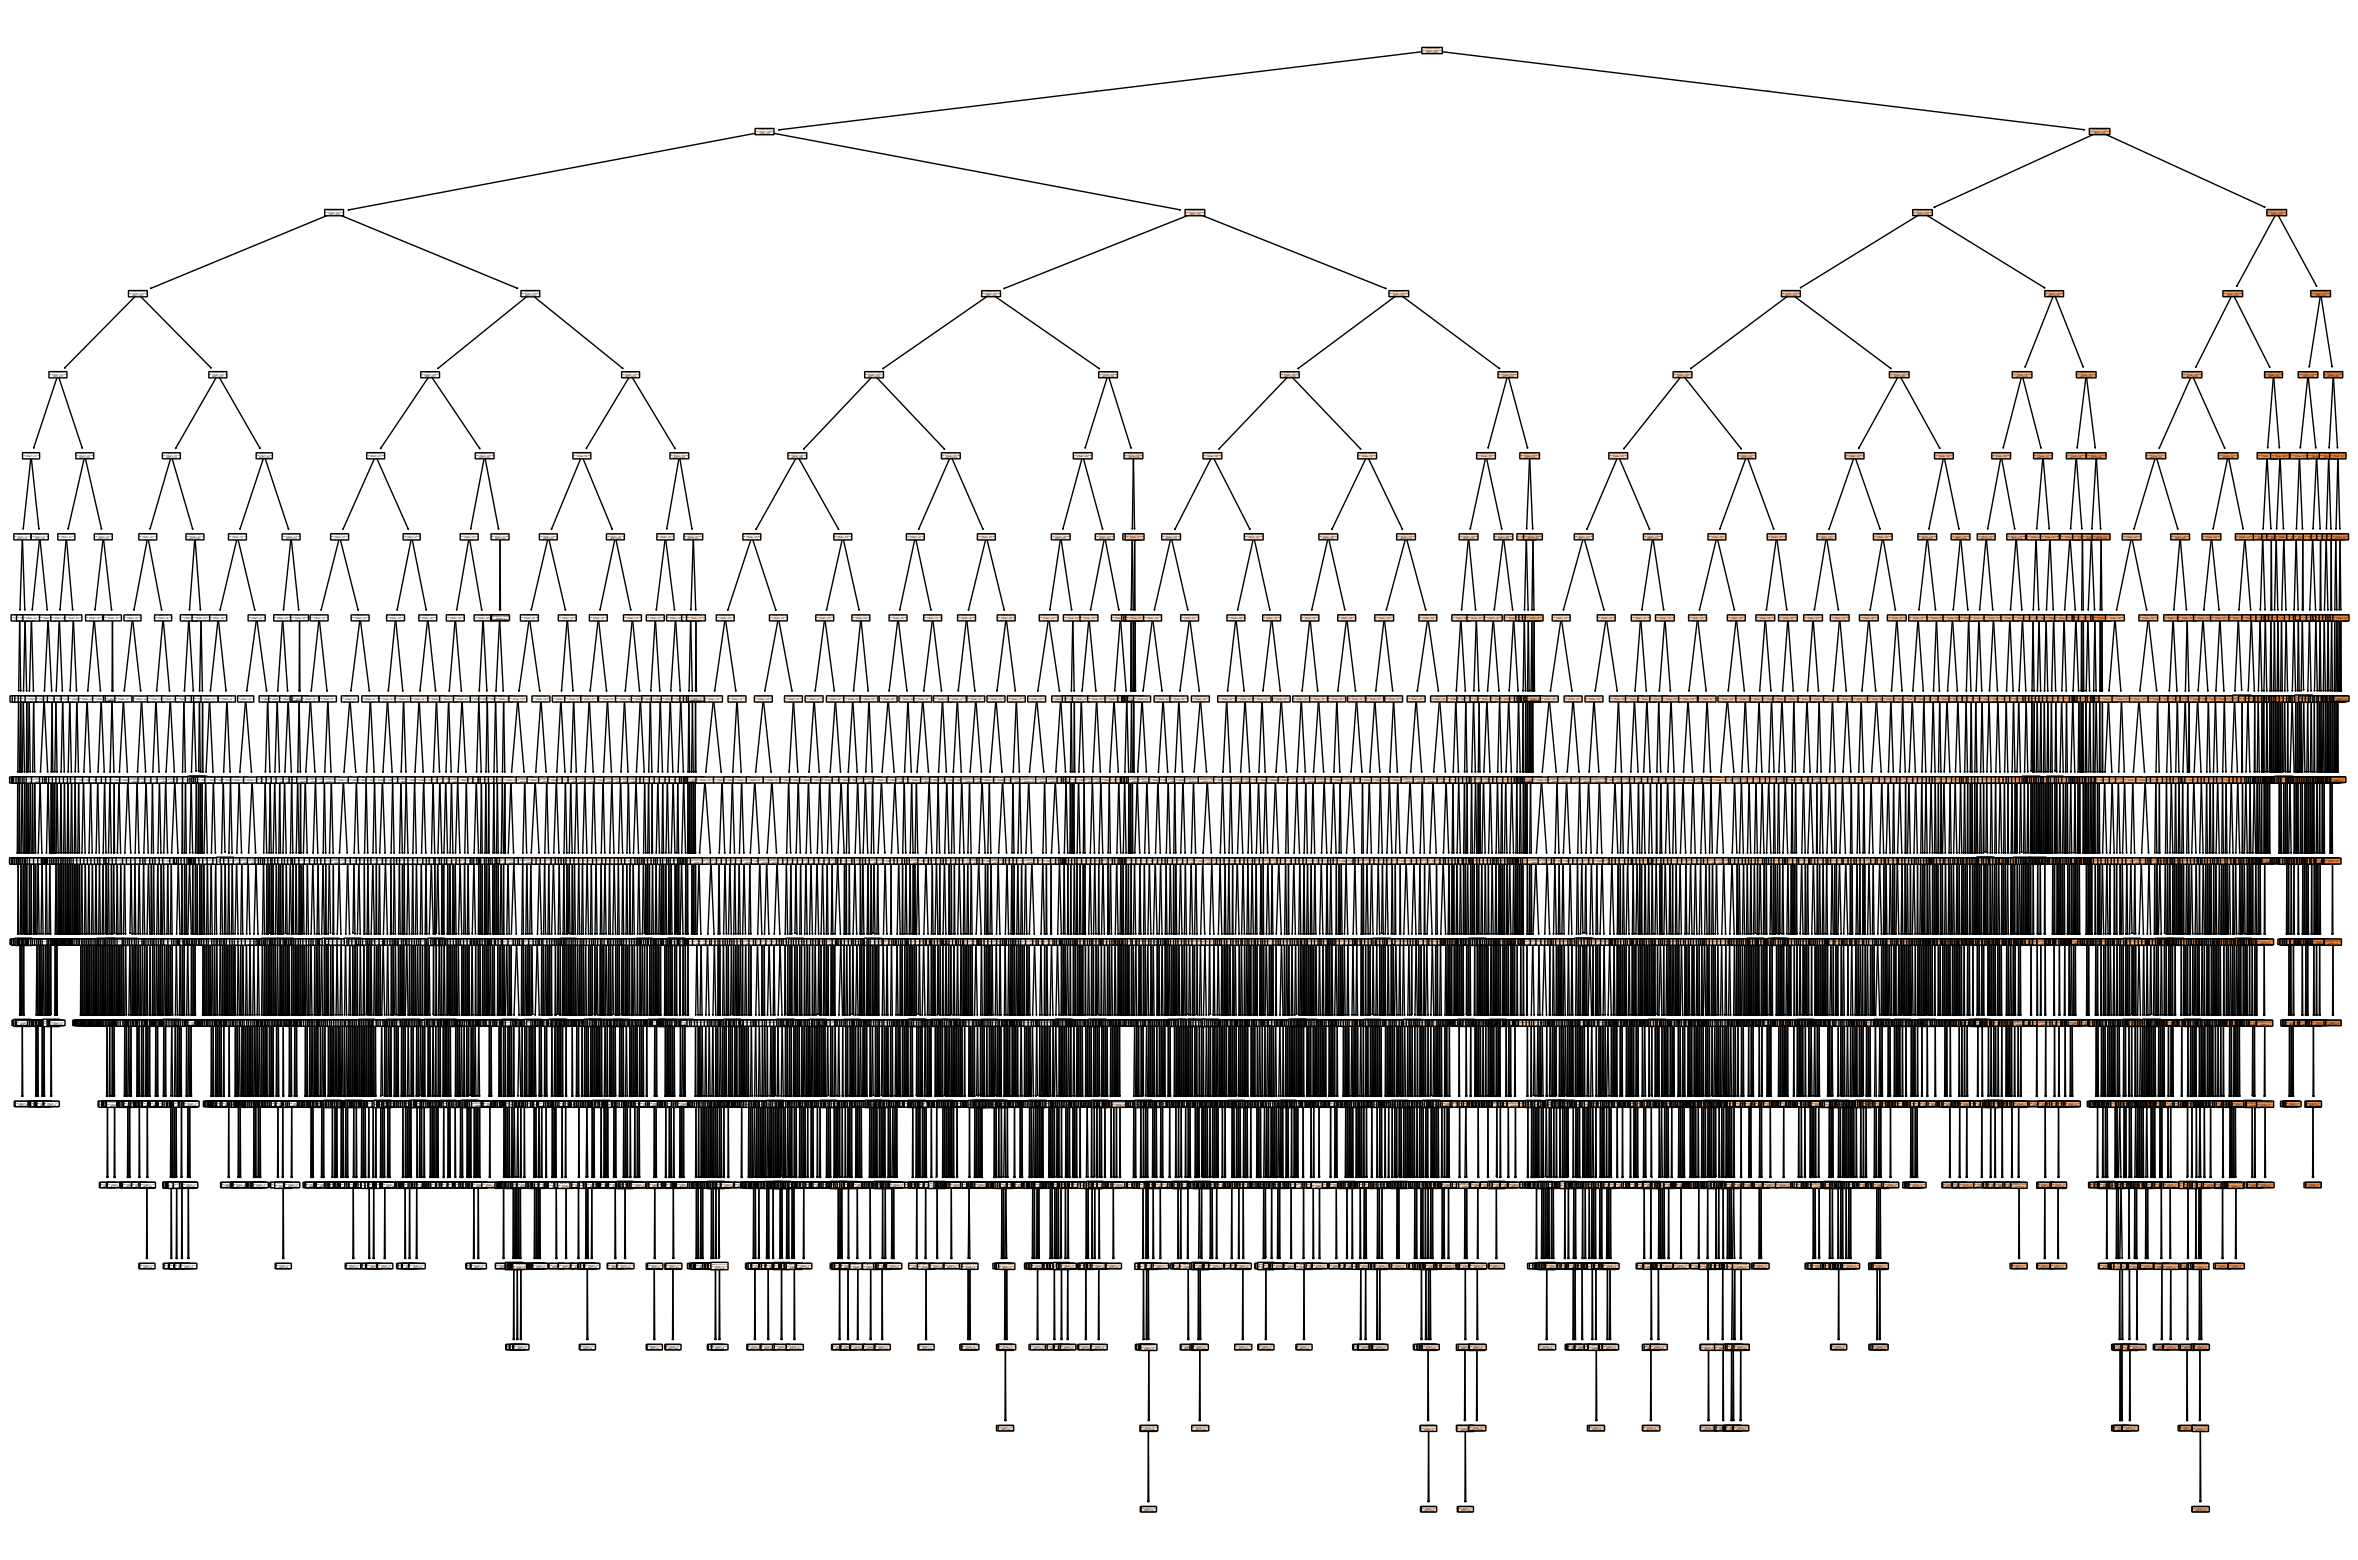

In [63]:
# Plot Decision Tree

from sklearn.tree import plot_tree

plt.figure(figsize=(30, 20))
plot_tree(
    dt_grid.best_estimator_,
    feature_names=X_train.columns,
    filled=True,
    rounded=True
)
plt.show()

In [64]:
# No of Nodes and Depth of the Tree

n_nodes = dt_grid.best_estimator_.tree_.node_count
depth = dt_grid.best_estimator_.tree_.max_depth

print(f'Number of Nodes: {n_nodes}')
print(f'Depth of the Tree: {depth}')

Number of Nodes: 8067
Depth of the Tree: 18


In [65]:
# Random Forest

In [66]:
rf = RandomForestRegressor(random_state=42)

rf_params = {
    'n_estimators': [100],
    'max_depth': [10],
    'max_samples': [0.6],
    'max_features': [0.7]
}

rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=rf_params,
    cv=3
)

rf_grid.fit(X_train, y_train)

print("Random Forest Best Parameters:", rf_grid.best_params_)
print('Random Forest Best Model:', rf_grid.best_estimator_)
print(f'Training Score: {rf_grid.score(X_train, y_train)}')
print(f'Testing Score: {rf_grid.score(X_test, y_test)}')

Random Forest Best Parameters: {'max_depth': 10, 'max_features': 0.7, 'max_samples': 0.6, 'n_estimators': 100}
Random Forest Best Model: RandomForestRegressor(max_depth=10, max_features=0.7, max_samples=0.6,
                      random_state=42)
Training Score: 0.9998700637596483
Testing Score: 0.9997485437374757


In [67]:
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10], 'max_features': [0.7],
                         'max_samples': [0.6], 'n_estimators': [100]})

In [68]:
# For Random Forest, GridSearchCV was used to find the best number of trees, tree depth, and split criteria. This improves model performance by tuning how multiple trees are built and combined.

In [69]:
# Gradient Boosting

In [70]:
gb = GradientBoostingRegressor(random_state=42)

gb_params = {
    'n_estimators': [100],
    'learning_rate': [0.1],
    'max_depth': [3],
}

gb_grid = GridSearchCV(
    estimator=gb,
    param_grid=gb_params,
    cv=3
)

gb_grid.fit(X_train, y_train)

print("Gradient Boosting Best Parameters:", gb_grid.best_params_)
print('Gradient Boosting Best Model:', gb_grid.best_estimator_)
print(f'Training Score: {gb_grid.score(X_train, y_train)}')
print(f'Testing Score: {gb_grid.score(X_test, y_test)}')

Gradient Boosting Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Gradient Boosting Best Model: GradientBoostingRegressor(random_state=42)
Training Score: 0.9992209615457543
Testing Score: 0.9990739196595664


In [71]:
gb_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.1], 'max_depth': [3],
                         'n_estimators': [100]})

In [72]:
# For Gradient Boosting, GridSearchCV was used to tune the number of boosting stages, learning rate, and tree depth to find the best combination for accurate demand prediction.

In [73]:
#=========================================================================================================

## Evaluating model performance with different hyperparameter values using cross-validation techniques.

#=========================================================================================================

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
# Decision Tree – Cross-Validation Performance

In [76]:
dt_best_model = dt_grid.best_estimator_

dt_cv_scores = cross_val_score(
    dt_best_model,
    X_train,
    y_train,
    cv=5,
    scoring='neg_root_mean_squared_error'
)

print("Decision Tree CV RMSE:", -dt_cv_scores.mean())

Decision Tree CV RMSE: 4.636850958449717


In [77]:
#Explanation:-After tuning, I evaluated the Decision Tree model using cross-validation to measure its average performance across multiple data splits

In [78]:
#Random Forest – Cross-Validation Performance

In [79]:
rf_best_model = rf_grid.best_estimator_

rf_cv_scores = cross_val_score(
    rf_best_model,
    X_train,
    y_train,
    cv=5,
    scoring='neg_root_mean_squared_error'
)

print("Random Forest CV RMSE:", -rf_cv_scores.mean())

Random Forest CV RMSE: 3.1377869904684745


In [80]:
#Explanation:-Cross-validation was applied on the tuned Random Forest model to ensure consistent performance and avoid bias from a single train-test split.

In [81]:
#Gradient Boosting – Cross-Validation Performance

In [82]:
gb_best_model = gb_grid.best_estimator_

gb_cv_scores = cross_val_score(
    gb_best_model,
    X_train,
    y_train,
    cv=5,
    scoring='neg_root_mean_squared_error'
)

print("Gradient Boosting CV RMSE:", -gb_cv_scores.mean())

Gradient Boosting CV RMSE: 5.26559188832087


In [83]:
#Explanation:-For Gradient Boosting, cross-validation was used to evaluate how well the tuned model generalizes across different subsets of the data.

In [84]:
#=========
# Balancing Model Complexity
#==========

In [85]:
dt_best = dt_grid.best_estimator_
rf_best = rf_grid.best_estimator_
gb_best = gb_grid.best_estimator_

In [86]:
dt_cv_rmse = -cross_val_score(
    dt_best, X_train, y_train,
    cv=5, scoring='neg_root_mean_squared_error'
).mean()

rf_cv_rmse = -cross_val_score(
    rf_best, X_train, y_train,
    cv=5, scoring='neg_root_mean_squared_error'
).mean()

gb_cv_rmse = -cross_val_score(
    gb_best, X_train, y_train,
    cv=5, scoring='neg_root_mean_squared_error'
).mean()

In [87]:
#Comparing Train RMSE vs Cross-Validation RMSE
# Training RMSE
dt_train_rmse = np.sqrt(mean_squared_error(y_train, dt_best.predict(X_train)))
rf_train_rmse = np.sqrt(mean_squared_error(y_train, rf_best.predict(X_train)))
gb_train_rmse = np.sqrt(mean_squared_error(y_train, gb_best.predict(X_train)))

# Cross-Validation RMSE (from Task-5 Point-2)
print("Decision Tree  -> Train RMSE:", dt_train_rmse, "| CV RMSE:", dt_cv_rmse)
print("Random Forest -> Train RMSE:", rf_train_rmse, "| CV RMSE:", rf_cv_rmse)
print("Gradient Boosting -> Train RMSE:", gb_train_rmse, "| CV RMSE:", gb_cv_rmse)

Decision Tree  -> Train RMSE: 1.0123032589890986 | CV RMSE: 4.636850958449717
Random Forest -> Train RMSE: 1.9577502897278818 | CV RMSE: 3.1377869904684745
Gradient Boosting -> Train RMSE: 4.793708222547899 | CV RMSE: 5.26559188832087


In [88]:
#Interpretation Logic
print("\nInterpretation:")
print("If Train RMSE and CV RMSE are close, the model is well balanced.")
print("Large differences indicate overfitting or underfitting.")


Interpretation:
If Train RMSE and CV RMSE are close, the model is well balanced.
Large differences indicate overfitting or underfitting.


## 6.	**Model Evaluation:**
* Evaluation metrics for regression models: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (R^2), etc.
* Compare the performance of different models to select the best one.


In [89]:
# --------- Model Evaluation using the best estimators from GridSearchCV ---------------

# Get the best models after hyperparameter tuning
dt_best = dt_grid.best_estimator_
rf_best = rf_grid.best_estimator_
gb_best = gb_grid.best_estimator_

models = {
    "Decision Tree": dt_best,
    "Random Forest": rf_best,
    "Gradient Boosting": gb_best
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "RMSE": rmse, "MAE": mae, "MSE": mse, "R2": r2})

performance_df = pd.DataFrame(results).sort_values(by="RMSE")
print(performance_df)

               Model      RMSE       MAE        MSE        R2
1      Random Forest  2.744139  1.421735   7.530299  0.999749
0      Decision Tree  4.449160  2.141015  19.795027  0.999339
2  Gradient Boosting  5.266222  3.321054  27.733099  0.999074


In [90]:
# Final Random Forest Evaluation (Correct)
y_pred_rf = rf_best.predict(X_test)

r2 = r2_score(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae = mean_absolute_error(y_test, y_pred_rf)

print("Final Random Forest Performance:")
print(f"R2 Score : {r2:.4f}")
print(f"RMSE     : {rmse:.4f}")
print(f"MAE      : {mae:.4f}")

Final Random Forest Performance:
R2 Score : 0.9997
RMSE     : 2.7441
MAE      : 1.4217


In [91]:
## Final Random Forest Model: Based on comparative evaluation, the tuned Random Forest achieved the lowest error metrics and the highest R² score and was selected as the final model.

In [92]:
# Compare performance to select the best one

performance_df

,Model,RMSE,MAE,MSE,R2
1,Random Forest,2.744139,1.421735,7.530299,0.999749
0,Decision Tree,4.449160,2.141015,19.795027,0.999339
2,Gradient Boosting,5.266222,3.321054,27.733099,0.999074


In [93]:
# Best model

best_model = performance_df.iloc[0]['Model']
print(f"The best model is: {best_model}")

The best model is: Random Forest


In [94]:
print("Model Evaluation Metrics")
print("Metrics used: RMSE, MAE, MSE, R2")
print("Decision Tree     : High RMSE, High MAE, High MSE, Lower R2")
print("Random Forest     : Lowest RMSE, Lowest MAE, Lowest MSE, Highest R2")
print("Gradient Boosting : Highest RMSE, Highest MAE, Highest MSE, High R2")

Model Evaluation Metrics
Metrics used: RMSE, MAE, MSE, R2
Decision Tree     : High RMSE, High MAE, High MSE, Lower R2
Random Forest     : Lowest RMSE, Lowest MAE, Lowest MSE, Highest R2
Gradient Boosting : Highest RMSE, Highest MAE, Highest MSE, High R2


## **As per the model evaluation: (Summary)**

#### * Random Forest Regressor performed best due to its ability to capture nonlinear relationships and reduce overfitting.

#### * Weather features like temperature, season, and working day strongly influence demand.

#### * Feature engineering and hyperparameter tuning significantly improved model accuracy.

## 7. **DEPLOYMENT:**

In [95]:
# Save Model

joblib.dump(rf_best,'pipeline.pkl')

['pipeline.pkl']

In [96]:
#==============================
## Appendix: Time Series Forecasting (Optional)
#==============================
#This section explores univariate time series forecasting using ARIMA and
#SARIMA models to understand temporal patterns in bike rental demand.
#These models are included only for exploratory and comparative purposes.
#The final predictive model for this project is Random Forest Regression.
#The time series models below are NOT used for feature engineering,
#model training, or final prediction.

In [97]:
# Create a safe copy so Random Forest pipeline is unaffected
ts_df = df.copy()

In [98]:
# Keep only required columns
ts_df = ts_df[['dteday', 'cnt']]

# Convert date column
ts_df['dteday'] = pd.to_datetime(ts_df['dteday'])

# Sort and set index
ts_df = ts_df.sort_values('dteday')
ts_df.set_index('dteday', inplace=True)

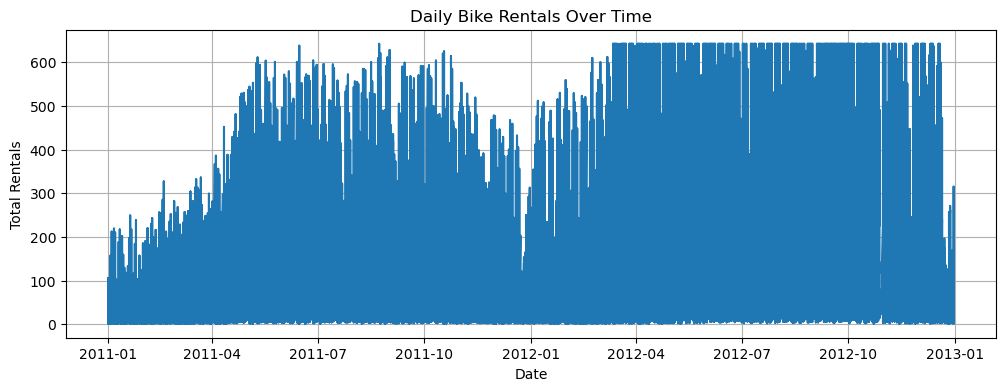

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(ts_df['cnt'])
plt.title("Daily Bike Rentals Over Time")
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.grid(True)
plt.show()

In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

train_size = int(len(ts_df) * 0.8)
train = ts_df.iloc[:train_size]
test = ts_df.iloc[train_size:]

### ARIMA = AutoRegressive Integrated Moving Average

Predicts future values using:

* Past values (AR)

* Differencing to remove trend (I)

* Past errors (MA)

Use ARIMA when:

* Data has trend

* Data has NO seasonality

In [101]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train['cnt'], order=(1,1,1))
arima_fit = arima_model.fit()

arima_forecast = arima_fit.forecast(steps=len(test))

arima_mae = mean_absolute_error(test['cnt'], arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(test['cnt'], arima_forecast))

print("ARIMA MAE:", arima_mae)
print("ARIMA RMSE:", arima_rmse)

c:\Users\chana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\chana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\chana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA MAE: 172.28315548931408
ARIMA RMSE: 202.04272208895188


c:\Users\chana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


#### Daily bike demand without strong monthly pattern.

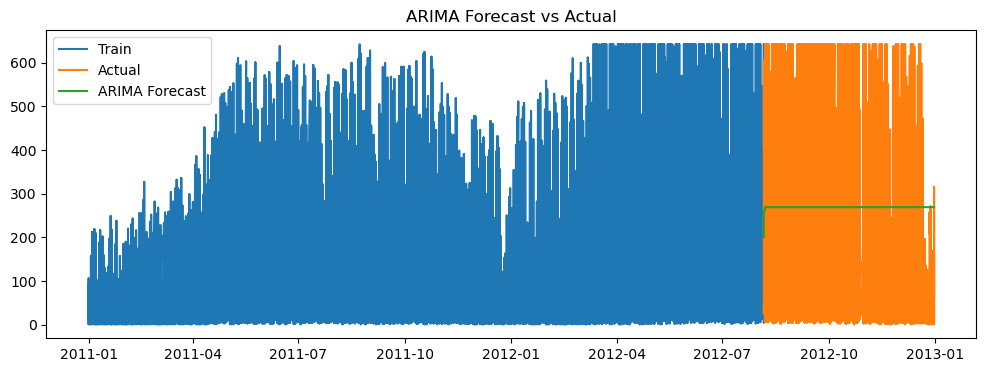

In [102]:
plt.figure(figsize=(12,4))
plt.plot(train.index, train['cnt'], label="Train")
plt.plot(test.index, test['cnt'], label="Actual")
plt.plot(test.index, arima_forecast, label="ARIMA Forecast")
plt.legend()
plt.title("ARIMA Forecast vs Actual")
plt.show()

### SARIMA = Seasonal ARIMA

Handles:

* Trend (like ARIMA)

* Seasonality (repeating patterns)

Use SARIMA when:

* Data shows seasonal pattern

* Monthly pattern

* Weekly pattern

* Hourly pattern

In [103]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(
    train['cnt'],
    order=(1,1,1),
    seasonal_order=(1,1,1,7),
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_fit = sarima_model.fit(disp=False)

sarima_forecast = sarima_fit.forecast(steps=len(test))

sarima_mae = mean_absolute_error(test['cnt'], sarima_forecast)
sarima_rmse = np.sqrt(mean_squared_error(test['cnt'], sarima_forecast))

print("SARIMA MAE:", sarima_mae)
print("SARIMA RMSE:", sarima_rmse)

c:\Users\chana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\chana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\chana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


SARIMA MAE: 184.26937689660045
SARIMA RMSE: 212.91338594822543


#### Bike demand higher in mornings & evenings every day → SARIMA is better

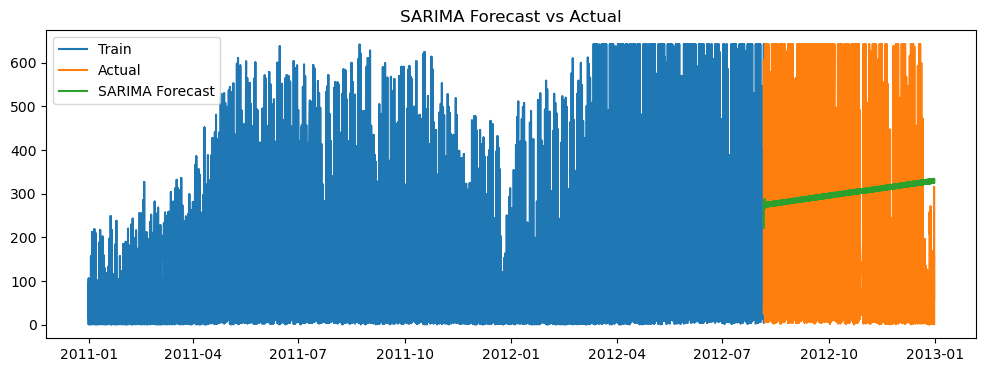

In [104]:
plt.figure(figsize=(12,4))
plt.plot(train.index, train['cnt'], label="Train")
plt.plot(test.index, test['cnt'], label="Actual")
plt.plot(test.index, sarima_forecast, label="SARIMA Forecast")
plt.legend()
plt.title("SARIMA Forecast vs Actual")
plt.show()

In [105]:
# Time Series Analysis (Appendix)
# This section is added to understand temporal patterns such as trend and seasonality
# in bike rental demand using univariate forecasting models.

# ARIMA and SARIMA models are included only for exploratory analysis.
# These models use only past rental values and do not consider external features.

# This section is placed at the bottom of the notebook to clearly indicate that
# Random Forest is the final predictive model used for deployment.

# ARIMA Forecast Plot:
# Shows how past values and short-term trends are used to predict future demand.

# SARIMA Forecast Plot:
# Extends ARIMA by capturing seasonal patterns (weekly/monthly cycles) in rentals.

In [106]:
#Time series models were added as exploratory analysis to understand trends and seasonality, while Random Forest remains the final model.
